# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest

size_sim = 10000
alpha = 0.05    #Significance level

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Helper Methods

In [11]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [10]:
def draw_bs_reps(data, func, size=1):
    bs_reps = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data))
        bs_rep = func(bs_sample)
        bs_reps[i] = bs_rep
    return bs_reps

# 1. Is the distribution of body temperatures normal?

(array([ 2.,  2.,  2.,  4.,  9.,  6., 10., 16., 18., 12., 18., 12., 11.,
         4.,  1.,  0.,  2.,  0.,  0.,  1.]),
 array([ 96.3  ,  96.525,  96.75 ,  96.975,  97.2  ,  97.425,  97.65 ,
         97.875,  98.1  ,  98.325,  98.55 ,  98.775,  99.   ,  99.225,
         99.45 ,  99.675,  99.9  , 100.125, 100.35 , 100.575, 100.8  ]),
 <a list of 20 Patch objects>)

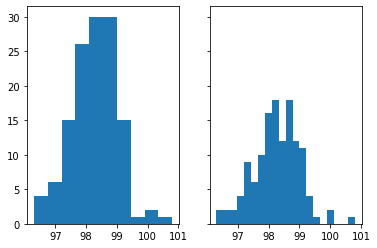

In [6]:
# Visualize temperature data
fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].hist(df.temperature, bins=10)
axs[1].hist(df.temperature, bins=20)

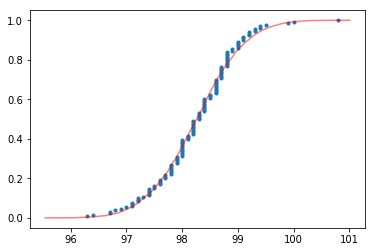

In [33]:
# Plot temperature ECDF
x_temp, y_temp = ecdf(df.temperature)
plt.plot(x_temp, y_temp, marker='.', linestyle='none')


# Plot normal temperature ECDF
mu_temp = np.mean(df.temperature)
sigma_temp = np.std(df.temperature)
norm_temp = np.random.normal(mu_temp, sigma_temp, size_sim)
x_norm_temp, y_norm_temp = ecdf(norm_temp)
plt.plot(x_norm_temp, y_norm_temp, color='red', alpha=0.5)

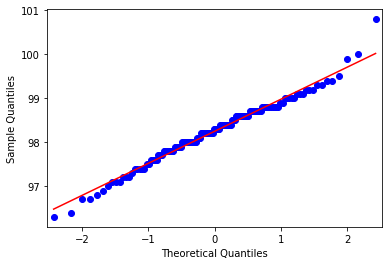

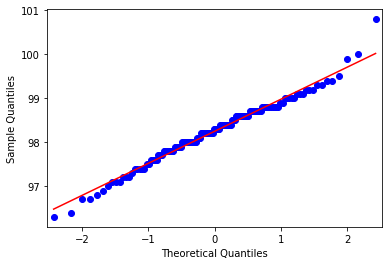

In [8]:
# Quantile-Quantile PlotQQ plot
qqplot(df.temperature, line='s')

In [18]:
# Shapiro-Wilk Test
_, p = stats.shapiro(df.temperature)
if p > 0.05:
    print('The distribution of Body temperature looks normal')
else:
    print('The distribution of body temperature does not look normal')

The distribution of Body temperature looks normal


From the plots and test, we can conclude that the distribution of body temperature **is normal**.

# 2. Is the sample size large? Are the observations independent?

In [10]:
df.count() > 30

temperature    True
gender         True
heart_rate     True
dtype: bool

The sample size is larger than thirty which can ba considered as **large enough**.

A person's temperature and heart rate are hard to affect another's unless they're physical very close to each other during observation. So the observations can be considered as **independent**.

# 3. Is the true population mean really 98.6 degrees F?

## Bootstrap Hypothesis Test

**H0: The true population mean is 98.6F.**

In [12]:
true_temp_mean = 98.6
bs_mean = draw_bs_reps(df.temperature, func=np.mean, size=10000)
p = np.sum(bs_mean >= true_temp_mean) / len(bs_mean)
if p > alpha:
    print(f'The true population mean is {true_temp_mean}F (Fail to reject H0)')
else:
    print(f'The true population mean is not {true_temp_mean}F (Reject H0)')

The true population mean is not 98.6F (Reject H0)


The true population mean is **not** 98.6 degrees F.

## Frequentist Statistical Test

As we are testing if the population mean of the body temperature is equal to a constant (in this case 98.6) instead of if the body temperature of men and women are identical, we should use **one-sample test**.

As the standard deviation of population is unknown, **t statistic test** is often more accurate in this case.

### T Test By Hand

In [34]:
n = len(df.temperature)
t = (mu_temp - true_temp_mean) / sigma_temp * np.sqrt(n)
p = (1 - stats.t.cdf(np.abs(t), df=n-1)) * 2
print(f't: {t}, p: {p}')

t: -5.475925202078116, p: 2.1887464618508545e-07


### T Test By SciPy

In [15]:
t, p = stats.ttest_1samp(df.temperature, true_temp_mean)
print(f't: {t}, p: {p}')
if p > alpha:
    print(f'The true population mean is {true_temp_mean}F (Fail to reject H0)')
else:
    print(f'The true population mean is not {true_temp_mean}F (Reject H0)')    

t: -5.4548232923645195, p: 2.4106320415561276e-07
The true population mean is not 98.6F (Reject H0)


### Z Test

In [46]:
z, p = ztest(df.temperature)
print(f'z: {z}, p: {p}')
if p > alpha:
    print(f'The true population mean is {true_temp_mean}F (Fail to reject H0)')
else:
    print(f'The true population mean is not {true_temp_mean}F (Reject H0)')

z: 1527.8768644603886, p: 0.0
The true population mean is not 98.6F (Reject H0)


# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [7]:
df_temp_10 = df.temperature.sample(n=10, random_state=1)

### T Test

In [16]:
t, p = stats.ttest_1samp(df_temp_10, true_temp_mean)
print(f't: {t}, p: {p}')
if p > alpha:
    print(f'The true population mean is {true_temp_mean}F (Fail to reject H0)')
else:
    print(f'The true population mean is not {true_temp_mean}F (Reject H0)')    

t: -1.9658186252250536, p: 0.08088423631974037
The true population mean is 98.6F (Fail to reject H0)


### Z Test

In [14]:
z, p = ztest(df_temp_10)
print(f'z: {z}, p: {p}')
if p > alpha:
    print(f'The true population mean is {true_temp_mean}F (Fail to reject H0)')
else:
    print(f'The true population mean is not {true_temp_mean}F (Reject H0)')

z: 350.4518476423954, p: 0.0
The true population mean is not 98.6F (Reject H0)


(array([1., 1., 2., 0., 1., 1., 1., 2., 0., 1.]),
 array([96.7 , 96.98, 97.26, 97.54, 97.82, 98.1 , 98.38, 98.66, 98.94,
        99.22, 99.5 ]),
 <a list of 10 Patch objects>)

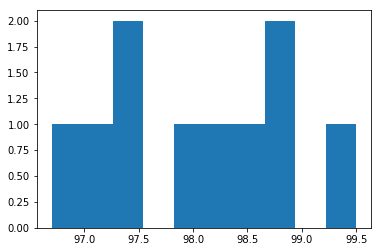

In [18]:
# Plot distribution of the sample
plt.hist(df_temp_10)

T test for small sample shows a different result. It fails to reject H0.

The reason is that the sample size is too small and not normally distributed.

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

### Calculate Abnormal Values

In [31]:
q3 = np.percentile(df.temperature, 75)
q1 = np.percentile(df.temperature, 15)
iqr = q3 - q1
abnormal_high = q3 + 1.5*iqr
abnormal_low = q1 - 1.5*iqr
print(f'Temperature larger than {abnormal_high:.1f}F or lower than {abnormal_low:.1f}F would be abnormal.')

Temperature larger than 100.5F or lower than 95.7F would be abnormal.


### Assume confidence level is 95%

In [35]:
confidence_level = 0.95

### Z Test

In [52]:
z = stats.norm.ppf(q=confidence_level + (1-confidence_level)/2)
z

1.959963984540054

In [53]:
margin_of_error = z * (sigma_temp / np.sqrt(n))
margin_of_error

0.12554865777413815

In [51]:
confidence_interval = (mu_temp - margin_of_error, mu_temp + margin_of_error)
confidence_interval

(98.12368211145665, 98.37477942700491)

# 6. Is there a significant difference between males and females in normal temperature?

T test should be used for two reasons:
1. Population standard deviation is unknow.
2. Comparison between two sample means.